In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [82]:
options : pd.DataFrame = pd.read_csv("data/cleaned_options_data.csv")
options["day"] = options["ts_recv"].apply(lambda x: x.split("T")[0])




In [59]:
options_data_instrument = options.loc[options['symbol'].str.contains('240216C05030000'), :]
options_data_instrument.sort_values(['day', 'bid_px_00'], ascending=[True, False])
instrument_data = options_data_instrument.groupby('day').first()

instrument_data['price'] = (instrument_data['bid_px_00'] + instrument_data['ask_px_00']) / 2

/var/folders/1g/l8bcpmkn2hs1dx91vyw0c7pc0000gn/T/ipykernel_54459/465525873.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  underlying['date'] = pd.to_datetime(underlying['date'])


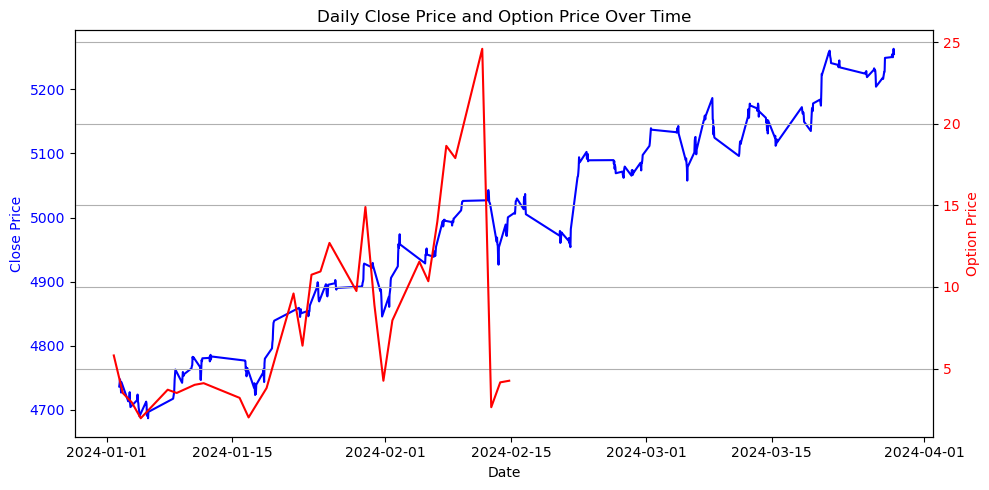

In [61]:
# Load and preprocess underlying data
underlying = pd.read_csv("data/underlying_data_hour.csv")
underlying.columns = underlying.columns.str.lower()
underlying['date'] = pd.to_datetime(underlying['date'])
underlying.set_index('date', inplace=True)

# Load and preprocess instrument data
instrument_data = instrument_data.reset_index()
instrument_data['day'] = pd.to_datetime(instrument_data['day'])
instrument_data.set_index('day', inplace=True)

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the underlying data on the left y-axis
ax1.plot(underlying.index, underlying['close'], label='Daily Close Price', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(instrument_data.index, instrument_data['price'], label='Option Price', color='r')
ax2.set_ylabel('Option Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and grid
plt.title('Daily Close Price and Option Price Over Time')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()

In [4]:
options['ts_recv'] = pd.to_datetime(options['ts_recv'])
options.set_index('ts_recv', inplace=True)
options.sort_index(inplace=True)

In [30]:
options.loc[options['instrument_id'] == 587228771, :]

,instrument_id,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,symbol,day
ts_recv,,,,,,,
2024-01-02 14:30:02.402838204+00:00,587228771,27.00,27.7,174,155,SPX 240119P04700000,2024-01-02
2024-01-02 14:30:03.036928037+00:00,587228771,27.00,27.7,174,155,SPX 240119P04700000,2024-01-02
2024-01-02 14:30:22.325164589+00:00,587228771,25.80,26.5,459,839,SPX 240119P04700000,2024-01-02
2024-01-02 14:30:22.329975915+00:00,587228771,26.10,26.5,55,90,SPX 240119P04700000,2024-01-02
2024-01-02 14:30:26.539459426+00:00,587228771,25.80,26.4,377,296,SPX 240119P04700000,2024-01-02
...,...,...,...,...,...,...,...
2024-01-31 16:55:30.988426401+00:00,587228771,1.80,1.9,2049,890,SPX 240216P04360000,2024-01-31
2024-01-31 16:55:30.988431331+00:00,587228771,1.80,1.9,2049,890,SPX 240216P04360000,2024-01-31
2024-01-31 16:55:30.988436836+00:00,587228771,1.80,1.9,2049,890,SPX 240216P04360000,2024-01-31


In [ ]:
row = options.sample(n=1).iloc[0]
row

In [87]:
start_date : datetime = datetime(2024, 1, 1)
end_date : datetime = datetime(2024, 3, 30)

options['day'] = options.loc[:, 'day'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))


In [ ]:
order = {
    "datetime" : row["ts_recv"],
    "option_symbol" : row["symbol"],
    "action" : action,
    "order_size" : order_size
}

In [88]:
current_date = start_date
while current_date <= end_date:
    print(current_date)
    current_data = options.loc[options['day'] == current_date, :]
    if current_data.shape[0] == 0:
        current_date = current_date + pd.DateOffset(days=1)
        continue
    
    
    current_data = current_data.sort_values(['instrument_id', 'bid_px_00'])
    display(current_data.head())
    break
    
    current_date = current_date + pd.DateOffset(days=1)
    

2024-01-01 00:00:00
2024-01-02 00:00:00


,ts_recv,instrument_id,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,symbol,day
10602,2024-01-02T17:08:43.797896826Z,587202711,214.5,227.2,31,56,SPX 261218P04000000,2024-01-02
1056,2024-01-02T14:42:23.109818891Z,587202715,702.3,709.6,20,69,SPX 241220C04300000,2024-01-02
1098,2024-01-02T14:42:44.023938914Z,587202715,706.4,707.8,76,8,SPX 241220C04300000,2024-01-02
1092,2024-01-02T14:42:41.017568774Z,587202715,706.9,708.3,10,2,SPX 241220C04300000,2024-01-02
14818,2024-01-02T19:07:59.751930078Z,587202723,73.0,74.3,195,146,SPX 241220C05400000,2024-01-02


In [97]:
instrument_ids = current_data['instrument_id'].unique()
arbitrage_cutoff = 0.75 # cents
orders = []

def find_arbitrage(instrument_data: pd.DataFrame):
    global orders
    instrument_data = instrument_data.sort_values(['bid_px_00'])
    best_bid = instrument_data[['bid_px_00', 'bid_sz_00', 'symbol', 'ts_recv']].reset_index(drop=True)
    instrument_data = instrument_data.sort_values(['ask_px_00'], ascending=False)
    best_ask = instrument_data[['ask_px_00', 'ask_sz_00', 'symbol', 'ts_recv']].reset_index(drop=True)
    
    # concaenate the two dfs horizontally
    concatenated_df = pd.concat([best_bid, best_ask], axis=1)
    bid_pointer = 0
    ask_pointer = len(concatenated_df) - 1
    
    # display(concatenated_df)
    
    while bid_pointer < len(concatenated_df) and ask_pointer >= 0:
        if concatenated_df.at[bid_pointer, 'bid_px_00'] < concatenated_df.at[ask_pointer, 'ask_px_00'] + .5:
            bid_pointer += 1
        else:
            bid_size = concatenated_df.at[bid_pointer, 'bid_sz_00']
            ask_size = concatenated_df.at[ask_pointer, 'ask_sz_00']
            order_size = min(bid_size, ask_size)
            curr_bid, curr_ask = bid_pointer, ask_pointer
            
            if bid_size > ask_size:
                concatenated_df.at[bid_pointer, 'bid_sz_00'] -= order_size
                ask_pointer -= 1
            elif bid_size < ask_size:
                concatenated_df.at[ask_pointer, 'ask_sz_00'] -= order_size
                bid_pointer += 1
            else:
                concatenated_df.at[bid_pointer, 'bid_sz_00'] -= order_size
                concatenated_df.at[ask_pointer, 'ask_sz_00'] -= order_size
                bid_pointer += 1
                ask_pointer -= 1
                        
            if order_size > 0:
                orders.append({
                    "datetime" : best_bid.at[curr_bid, 'ts_recv'],
                    "option_symbol" : best_bid.at[curr_bid, 'symbol'],
                    "action" : "S",
                    "order_size" : order_size
                })
                orders.append({
                    "datetime" : best_ask.at[curr_ask, 'ts_recv'],
                    "option_symbol" : best_ask.at[curr_ask, 'symbol'],
                    "action" : "B",
                    "order_size" : order_size
                })
                
                
    return None


cnt = 0
for instrument_id in instrument_ids:
    instrument_data = current_data.loc[current_data['instrument_id'] == instrument_id, :]

    find_arbitrage(instrument_data)
    cnt += 1
    
    if cnt == 10:
        break
    

{'datetime': '2024-01-02T15:31:58.883454302Z',
 'option_symbol': 'SPX   241220C05400000',
 'action': 'S',
 'order_size': np.int64(145)}

{'datetime': '2024-01-02T19:07:59.751930078Z',
 'option_symbol': 'SPX   241220C05400000',
 'action': 'B',
 'order_size': np.int64(145)}

In [128]:
current_date = start_date
arbitrage_cutoff = 0.75 # cents
orders = []

options : pd.DataFrame = pd.read_csv("data/cleaned_options_data.csv")
options["day"] = options["ts_recv"].apply(lambda x: x.split("T")[0])
options['day'] = options.loc[:, 'day'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))





def find_arbitrage(instrument_data: pd.DataFrame):
    global orders
    instrument_data = instrument_data.sort_values(['bid_px_00'])
    best_bid = instrument_data[['bid_px_00', 'bid_sz_00', 'symbol', 'ts_recv']].reset_index(drop=True)
    instrument_data = instrument_data.sort_values(['ask_px_00'], ascending=False)
    best_ask = instrument_data[['ask_px_00', 'ask_sz_00', 'symbol', 'ts_recv']].reset_index(drop=True)
    
    # concaenate the two dfs horizontally
    concatenated_df = pd.concat([best_bid, best_ask], axis=1)
    bid_pointer = 0
    ask_pointer = len(concatenated_df) - 1
    
    # display(concatenated_df)
    
    while bid_pointer < len(concatenated_df) and ask_pointer >= 0:
        if concatenated_df.at[bid_pointer, 'bid_px_00'] < concatenated_df.at[ask_pointer, 'ask_px_00'] + arbitrage_cutoff:
            bid_pointer += 1
        else:
            bid_size = concatenated_df.at[bid_pointer, 'bid_sz_00']
            ask_size = concatenated_df.at[ask_pointer, 'ask_sz_00']
            order_size = min(bid_size, ask_size)
            curr_bid, curr_ask = bid_pointer, ask_pointer
            bid_time, ask_time = best_bid.at[curr_bid, 'ts_recv'], best_ask.at[curr_ask, 'ts_recv']
            
            if ask_time > bid_time:
                bid_pointer += 1
                continue
            
            
            if bid_size > ask_size:
                concatenated_df.at[bid_pointer, 'bid_sz_00'] -= order_size
                ask_pointer -= 1
            elif bid_size < ask_size:
                concatenated_df.at[ask_pointer, 'ask_sz_00'] -= order_size
                bid_pointer += 1
            else:
                concatenated_df.at[bid_pointer, 'bid_sz_00'] -= order_size
                concatenated_df.at[ask_pointer, 'ask_sz_00'] -= order_size
                bid_pointer += 1
                ask_pointer -= 1
                        
            if order_size > 0:
                order_size = min(order_size, 50)
                orders.append({
                    "datetime" : best_bid.at[curr_bid, 'ts_recv'],
                    "option_symbol" : best_bid.at[curr_bid, 'symbol'],
                    "action" : "S",
                    "order_size" : order_size
                })
                orders.append({
                    "datetime" : best_ask.at[curr_ask, 'ts_recv'],
                    "option_symbol" : best_ask.at[curr_ask, 'symbol'],
                    "action" : "B",
                    "order_size" : order_size
                })
                break
                
                
    return None

while current_date <= end_date:
    current_data = options.loc[options['day'] == current_date, :]
    print(current_date, current_data.shape[0])
    if current_data.shape[0] == 0:
        current_date = current_date + pd.DateOffset(days=1)
        continue
    
    
    current_data = current_data.sort_values(['instrument_id', 'bid_px_00'])
    instrument_ids = current_data['instrument_id'].unique()
    
    for instrument_id in instrument_ids:
        instrument_data = current_data.loc[current_data['instrument_id'] == instrument_id, :]

        find_arbitrage(instrument_data) # global appends ot orders
    
    current_date = current_date + pd.DateOffset(days=1)

2024-01-01 00:00:00 0
2024-01-02 00:00:00 22556
2024-01-03 00:00:00 21409


KeyboardInterrupt: 

In [125]:
df = pd.DataFrame(orders)

In [126]:
df.to_csv("data/orders.csv", index=False)

In [123]:
df

,datetime,option_symbol,action,order_size
0,2024-01-02T20:51:55.295389518Z,SPX 241220C04000000,S,10
1,2024-01-02T20:47:38.971421974Z,SPX 241220C04000000,B,10
2,2024-01-02T20:08:54.236189805Z,SPX 240621P04300000,S,10
3,2024-01-02T18:49:34.268285863Z,SPX 240621P04300000,B,10
4,2024-01-02T16:55:16.811967114Z,SPX 240621C04600000,S,10
...,...,...,...,...
47527,2024-03-28T15:26:20.441821542Z,SPX 241220P05275000,B,10
47528,2024-03-28T20:03:48.235720941Z,SPX 240920P05375000,S,10
47529,2024-03-28T19:34:38.343814675Z,SPX 240920P05375000,B,10
47530,2024-03-28T18:16:18.328707852Z,SPX 240920P05260000,S,10
